# 2. Exploración y visualización de datos #

Trabajaremos con funciones que lo ayudarán a derivar estadísticas descriptivas y resumidas de sus datos. 

Construirá **tablas dinámicas** y realizará pruebas y análisis comparativos para descubrir relaciones ocultas entre varios puntos de datos. 

Finalmente, usaremos **gráficas** utilizando dos de los paquetes de Python como Matplotlib y Seaborn.

## Identificar y enfocarse en los atributos correctos ##

Los objetivos y campañas de marketing a menudo implican métricas objetivo. Estas métricas pueden depender del conocimiento del dominio y la perspicacia empresarial y se conocen como **indicadores clave de rendimiento** (KPI). 

Como analista de marketing, deberá poder analizar las **relaciones** entre los atributos para cuantificar sus datos de acuerdo con estas métricas. 

Por ejemplo, se le puede pedir que derive cualquiera de los siguientes KPI de uso común a partir de un conjunto de datos que comprende 30 columnas impares:

- Ingresos: ¿Cuáles son las ventas totales que genera la empresa en un período de tiempo determinado?

- Beneficio: ¿Cuál es el dinero que gana una empresa de sus ventas totales después de deducir sus gastos?

- Valor del ciclo de vida del cliente: ¿Cuál es la métrica que indica los ingresos totales que la empresa puede esperar de un cliente a lo largo de su asociación?

- Costo de adquisición de clientes: ¿Cuál es la cantidad de dinero que gasta una empresa para convertir un cliente potencial en un cliente?

- Tasa de conversión: ¿Cuántas de todas las personas a las que se ha dirigido una campaña de marketing compraron realmente el producto o utilizaron los servicios de la empresa?

- Churn: ¿Cuántos clientes han dejado de usar los servicios de la empresa o han dejado de comprar el producto?

Identificar las columnas que no son necesarias y  usar sus herramientas de análisis de datos para calcular las métricas necesarias. Pandas, tiene herramientas forma de funciones y colecciones que ayudan a generar información. Una de estas funciones útiles es **groupby**.

## The groupby( ) Function ##

Eche un vistazo a los siguientes datos almacenados en una hoja de Excel:

https://docs.google.com/spreadsheets/d/1hmmeGDqxIwNroVs1b8ASWLmMx-RkCAOf/edit?usp=sharing&ouid=106781503155204672929&rtpof=true&sd=true7

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=18g7hqykT2gXieNb_wBFCkex7hLpgeeIK' width="800" />
<figcaption>Figura 2.1: Ejemplo de datos de ventas en una hoja de Excel</figcaption></center>
</figure>


Utilizando este conjunto de datos, vamos a calcular individualmente las sumas de los valores almacenados en las siguientes columnas: 
- Ingresos, Ingresos planificados, Costo del producto, Cantidad (las cuatro columnas anotadas por 2) y Beneficio bruto (anotado por 3). 

Luego, separar las sumas de valores para cada columna por los países enumerados en la columna retailer_country (anotado por 1). Antes de realizar cambios, su primera tarea sería analizar visualmente los datos y encontrar patrones.

Observando los datos, se puede ver que los nombres de los países se repiten bastante. Ahora, en lugar de calcular cuántos países únicos existen, simplemente podemos agrupar estas filas usando tablas dinámicas de la siguiente forma:





<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1lsyRrat6MXVIXb-8gUOtlaxj3wRfN2WQ' width="800" />
<figcaption>Figura 2.2: Pivot of sales data in Excel</figcaption></center>
</figure>

En la figura anterior, no solo se agrupan los datos por varios países, sino que también se **suman** los valores de Planned revenue, Product cost, Quantity y Gross profit. Eso resuelve nuestro problema. Pero, ¿y si estos datos se almacenaran en
un DataFrame?

Aquí es donde la función groupby resulta útil.

    groupby(col)[cols].agg_func

Esta función agrupa filas con valores similares en una columna denotada por **col** y aplica la función de agregador **agg_func** a la columna del DataFrame denotada por cols.

Por ejemplo, piense en los datos de ventas de muestra como un DataFrame. Ahora, se desea conocer los ingresos planificados totales por país. Para eso, deberá agrupar los países y centrándose en la columna **Planned revenue**, sumar todos los valores que corresponden a los países agrupados. 

En el siguiente comando, agrupamos los valores presentes en la columna País y agregamos los valores correspondientes de la columna Ingresos planificados.

In [ ]:
#@title Ejemplo groupby(col)[cols].agg_func
import pandas as pd
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-1b/sales_excel.csv -O
sales_excel = pd.read_csv("sales_excel.csv") 

sales_excel.groupby('Retailer country')[['Revenue']].sum()

# sales_excel.groupby('Retailer country')[['Revenue',\
#                                    'Planned revenue',\
#                                    'Product cost',\
#                                    'Quantity',\
#                                    'Gross profit']].sum()

El resultado anterior muestra la suma de los ingresos planificados agrupados por país. Para ayudarnos a comparar mejor los resultados que obtuvimos con los resultados de nuestros datos de pivote en la Figura 2.2, también podemos **encadenar** otro comando de la siguiente manera:


In [ ]:
sales_excel.groupby('Retailer country')[['Revenue']].sum().round()

Si comparamos el resultado anterior con lo que obtuvimos en la Figura 2.2, podemos ver que hemos logrado los mismos resultados que la funcionalidad de pivote en Excel con una función de Pandas.

Algunas de las funciones de agregación más comunes que se pueden usar junto con la función groupby son las siguientes:

| Función  | Descripción |
| ------------- | ------------- |
|  count()  | Esta función devuelve el número total de valores presentes en la columna.  |
|  min()    | Esta función devuelve el valor mínimo presente en la columna  |
|  max()    | Esta función devuelve el valor máximo presente en la columna.  |
|  mean()    |esta función devuelve la media de todos los valores de la columna.  |
|  mediana()    | esta función devuelve el valor de la mediana en la columna.  |
|  mode()    |  Esta función devuelve el valor que ocurre con más frecuencia en la columna. |



## La función unique( ) ##

Una columna puede comprender muchas filas con numerosos valores únicos, lo que dificulta el uso de la función*** **groupby()**. También pueden contener muchos de valores duplicados y tener solo dos valores únicos. Por lo tanto, examinar cuánto varían sus valores en una columna es esencial antes de realizar más análisis. Pandas proporciona una función muy útil para hacer eso, y se llama **unique()**.

Por ejemplo, supongamos que tiene un conjunto de datos llamado **detalles del cliente** que contiene los nombres de los clientes, ID y países. 

Los datos se almacenan en un DataFrame y le gustaría ver una lista de todos los países en los que tiene clientes.

In [8]:
import pandas as pd
df = pd.DataFrame({'Customer ID': [101, 102, 103, 104,105, 106, 107, 108, 109], 
                  'Customer Name':['Tom', 'Fred', 'Amy', 'Sergio','Amy', 'Dominic', 'Xi', 'Hector', 'Annie'],
                  'Country':['Australia', 'Canada', 'Spain', 'Spain','India', 'Austria', 'China', 'Japan', 'Switzerland'],
                  })
df

,Customer ID,Customer Name,Country
0,101,Tom,Australia
1,102,Fred,Canada
2,103,Amy,Spain
3,104,Sergio,Spain
4,105,Amy,India
5,106,Dominic,Austria
6,107,Xi,China
7,108,Hector,Japan
8,109,Annie,Switzerland


Con solo mirar los datos, verá que hay muchos países en la columna titulada **Country**. Algunos nombres de países se repiten varias veces. Para saber dónde se encuentran sus clientes en todo el mundo, deberá filtrar todos los valores únicos en esta columna. Para hacer eso, puede usar la función única de la siguiente manera:

In [9]:
df['Country'].unique()

array(['Australia', 'Canada', 'Spain', 'India', 'Austria', 'China',
       'Japan', 'Switzerland'], dtype=object)

Puede ver en el resultado anterior que los clientes son de los siguientes países: Australia, Canadá, España, India, Austria, China, Japón, Suiza, Reino Unido, Nueva Zelanda y EE. UU.

Ahora que sabe a qué países pertenecen sus clientes, es posible que también desee saber cuántos clientes hay en cada uno de estos países. Esto se puede solucionar con la función value_counts() proporcionada por pandas.

## La función value_counts() ##
A veces, además de ver cuáles son los valores únicos en una columna, también desea saber el **recuento** de cada valor único en esa columna. Por ejemplo, si, después de ejecutar la función unique(), descubre que Producto 1, Producto 2 y Producto 3 son los únicos tres valores que se repiten en una columna que comprende 1000 filas; es posible que desee saber cuántas entradas de cada producto hay en la columna. En tales casos, puede usar la función **value_counts().** Esta función muestra los valores únicos de las categorías junto con sus recuentos.

Revisemos el conjunto de datos de detalles del cliente que encontramos en la sección anterior. Para saber el número de clientes presentes en cada país, podemos usar la función value_counts() de la siguiente manera:

In [ ]:
df['Country'].value_counts()

Spain          2
Australia      1
Canada         1
India          1
Austria        1
China          1
Japan          1
Switzerland    1
Name: Country, dtype: int64

En el resultado anterior, puede ver que el recuento de cada país se proporciona con el nombre del país.

# Ejercicio 2.01: Exploración de los atributos en los datos de ventas #

Tu equipo está creando una campaña de marketing para un cliente. Lo único que le han entregado es un archivo llamado sales.csv que, que contiene los registros históricos de ventas de la empresa.

Con estos datos, deberá obtener información que se utilizará para crear una campaña de marketing integral. No todos los conocimientos pueden ser útiles para el negocio, pero dado que primero presentará sus hallazgos a varios equipos, un conocimiento útil para un equipo puede no importar mucho para el otro equipo. Por lo tanto, su enfoque sería recopilar la mayor cantidad posible de información procesable y presentarla a las partes interesadas.

No conoce el período de tiempo de estas ventas históricas ni sabe qué productos vende la empresa. Descargue el archivo sales.csv de GitHub y obtenga tanta información como sea posible.

In [10]:
# 1. Importar librerias de Pandas
import pandas as pd
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-1b/sales.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1715k  100 1715k    0     0  6499k      0 --:--:-- --:--:-- --:--:-- 6524k


In [11]:
# 2. Cree un nuevo DataFrame de pandas llamado sales y del archivo sales.csv.
# Examine si sus datos se cargaron correctamente comprobando los primeros valores en
# el DataFrame usando el comando head():
sales = pd.read_csv('sales.csv')
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 3. Examine las columnas del DataFrame usando el siguiente código:
sales.columns

Index(['Year', 'Product line', 'Product type', 'Product', 'Order method type',
       'Retailer country', 'Revenue', 'Planned revenue', 'Product cost',
       'Quantity', 'Unit cost', 'Unit price', 'Gross profit',
       'Unit sale price'],
      dtype='object')

In [13]:
# 4. Utilice la función info para imprimir los tipos de datos de las columnas de DataFrame de sales
# usando el siguiente código:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17823 non-null  int64  
 1   Product line       17823 non-null  object 
 2   Product type       17823 non-null  object 
 3   Product            17823 non-null  object 
 4   Order method type  17823 non-null  object 
 5   Retailer country   17823 non-null  object 
 6   Revenue            6045 non-null   float64
 7   Planned revenue    6045 non-null   float64
 8   Product cost       6045 non-null   float64
 9   Quantity           5860 non-null   float64
 10  Unit cost          6045 non-null   float64
 11  Unit price         6045 non-null   float64
 12  Gross profit       6045 non-null   float64
 13  Unit sale price    6045 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB


In [14]:
# De la salida anterior, puede ver que el Year es de tipo de datos int y columnas
# como Línea de producto, Tipo de producto, etc. son de los tipos de objeto.

# 5. Para verificar el marco de tiempo de los datos, use la función única en la columna Año:
sales['Year'].unique()

array([2004, 2005, 2006, 2007])

In [15]:
# Puede ver que tenemos los datos de los años 2004 – 2007.

# Use la función única nuevamente para averiguar los tipos de productos que el
# empresa vende:
sales['Product line'].unique()

array(['Golf Equipment', 'Camping Equipment', 'Outdoor Protection',
       'Mountaineering Equipment'], dtype=object)

In [16]:
# Puede ver que la empresa vende cuatro tipos diferentes de productos.
# 7. Ahora, revisa la columna Tipo de producto:
sales['Product type'].unique()

array(['Golf Accessories', 'Sleeping Bags', 'Cooking Gear', 'First Aid',
       'Insect Repellents', 'Climbing Accessories'], dtype=object)

In [17]:
# De la salida anterior, puede ver que tiene seis productos diferentes
# tipos, a saber, accesorios de golf, sacos de dormir, equipo de cocina, 
# primeros auxilios, Repelentes de Insectos y Accesorios de Escalada.

# 8. Verifique la columna Producto para encontrar las categorías únicas presentes en ella:
sales['Product'].unique()

array(['Course Pro Golf and Tee Set', 'Hibernator Self - Inflating Mat',
       'TrailChef Deluxe Cook Set', 'Deluxe Family Relief Kit',
       'Course Pro Golf Bag', 'TrailChef Water Bag',
       'TrailChef Kitchen Kit', 'TrailChef Cook Set',
       'TrailChef Single Flame', 'TrailChef Double Flame',
       'Hibernator Camp Cot', 'BugShield Lotion Lite',
       'Compact Relief Kit', 'Insect Bite Relief', 'Course Pro Umbrella',
       'Course Pro Gloves', 'Firefly Climbing Lamp',
       'Firefly Rechargeable Battery', 'Granite Chalk Bag',
       'TrailChef Canteen', 'TrailChef Cup', 'TrailChef Kettle',
       'TrailChef Utensils', 'Hibernator Lite', 'Hibernator Extreme',
       'Hibernator Pad', 'Hibernator Pillow', 'BugShield Natural',
       'BugShield Spray', 'BugShield Lotion', 'BugShield Extreme',
       'Calamine Relief', 'Aloe Relief', 'Granite Carabiner',
       'Granite Belay', 'Granite Pulley', 'Firefly Charger', 'Hibernator'],
      dtype=object)

In [18]:
# 9. Ahora, verifique la columna Tipo de método de pedido para descubrir las formas a través de
# que el cliente puede realizar un pedido:
sales['Order method type'].unique()

# Como puede ver en la figura anterior, hay siete métodos de pedido diferentes 
# a través de los cuales un cliente puede realizar un pedido.

array(['Sales visit', 'Telephone', 'Web', 'Special', 'Mail', 'E-mail',
       'Fax'], dtype=object)

In [19]:
# 10. Vuelva a utilizar la misma función en la columna País del minorista para 
# conocer los países donde el cliente tiene presencia:
sales['Retailer country'].unique()

# El resultado anterior muestra la presencia geográfica de la empresa.

array(['United States', 'United Kingdom', 'Canada', 'Mexico', 'Brazil',
       'Japan', 'Korea', 'China', 'Singapore', 'Australia', 'Netherlands',
       'Sweden', 'Finland', 'Denmark', 'France', 'Germany', 'Belgium',
       'Switzerland', 'Austria', 'Italy', 'Spain'], dtype=object)

In [20]:
# 11. Ahora que ha analizado los valores categóricos, obtenga un resumen rápido de los
# campos numéricos usando la función describe:
sales.describe()

# Esto da el siguiente resultado:
# Puede observar que los ingresos medios que obtiene la empresa rondan
# $103,846. La función describe se utiliza para darnos una idea general sobre
# el rango de los datos presentes en el DataFrame.

,Year,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
count,17823.000000,6.045000e+03,6.045000e+03,6.045000e+03,5860.000000,6045.000000,6045.000000,6.045000e+03,6045.000000
mean,2005.164955,1.038455e+05,1.058923e+05,5.701932e+04,4691.273549,58.882618,48.900855,4.336203e+04,44.795072
std,0.956260,1.836042e+05,1.881274e+05,1.117846e+05,8950.955313,348.369401,62.814500,7.185831e+04,58.399255
min,2004.000000,0.000000e+00,0.000000e+00,3.360000e+01,5.000000,0.850000,3.660000,-1.336560e+04,0.000000
25%,2004.000000,1.364924e+04,1.383736e+04,5.759760e+03,625.000000,2.760000,7.000000,7.009650e+03,6.580000
50%,2005.000000,4.154119e+04,4.189571e+04,1.906720e+04,1695.000000,9.000000,18.000000,1.894653e+04,17.650000
75%,2006.000000,1.120026e+05,1.144758e+05,5.796000e+04,4858.000000,34.970000,66.770000,5.002308e+04,62.760000
max,2007.000000,3.644349e+06,3.477910e+06,2.061750e+06,164142.000000,7833.000000,265.140000,1.416160e+06,265.140000


In [21]:
# 12. Analice la dispersión de las columnas categóricas en los datos usando la 
# función value_counts(). Esto arrojaría luz sobre cómo se distribuyen los datos. 
# Comience con la columna Año:
sales['Year'].value_counts()

2004    5451
2005    5451
2006    5451
2007    1470
Name: Year, dtype: int64

In [22]:
# Del resultado anterior, puede ver que tiene alrededor de 5451 registros en el
# años 2004, 2005 y 2006 y el número de registros en el año 2007 es 1470.

# 13. Use la misma función en la columna Línea de producto:
sales['Product line'].value_counts()

# Como puede ver en el resultado anterior, Camping Equipment tiene la mayor
# número de observaciones en el conjunto de datos seguido de Outdoor Protection.

Camping Equipment           8562
Outdoor Protection          4410
Mountaineering Equipment    3087
Golf Equipment              1764
Name: Product line, dtype: int64

In [23]:
# 14. Ahora, verifique la columna Tipo de producto:
sales['Product type'].value_counts()

# El equipo de cocina, seguido de los accesorios para escalar, tiene el número más alto
# de observaciones en el conjunto de datos, lo que significa que estos tipos de 
# productos son muy populares entre los clientes.

Cooking Gear            5880
Climbing Accessories    3087
Sleeping Bags           2682
First Aid               2205
Insect Repellents       2205
Golf Accessories        1764
Name: Product type, dtype: int64

In [25]:
# 15. Ahora, descubra el método de pedido más popular usando el siguiente código:
sales['Order method type'].value_counts()

# Esto da el siguiente resultado:

# Casi todos los métodos de pedido están igualmente representados en el conjunto de datos que
# significa que los clientes tienen la misma probabilidad de realizar pedidos 
# a través de cualquiera de estos métodos.

Telephone      2547
Web            2547
Special        2547
Mail           2547
E-mail         2547
Fax            2547
Sales visit    2541
Name: Order method type, dtype: int64

In [26]:
# 16. Finalmente, verifique la columna del país del minorista junto con sus respectivos conteos:
sales['Retailer country'].value_counts()

# El resultado anterior muestra que los puntos de datos se distribuyen uniformemente 
# entre todos los países sin sesgos.

United States     865
United Kingdom    865
Sweden            847
Italy             847
Austria           847
Switzerland       847
Belgium           847
Germany           847
France            847
Denmark           847
Finland           847
Netherlands       847
Australia         847
Singapore         847
China             847
Korea             847
Japan             847
Brazil            847
Mexico            847
Canada            847
Spain             847
Name: Retailer country, dtype: int64

In [27]:
# 17. Obtenga información sobre las estadísticas de todo el país ahora. 
# Agrupe atributos como Ingresos, Ingresos planificados, Costo del producto, 
# Cantidad y Ganancia bruta por sus países, y sume sus valores correspondientes. 
sales.groupby('Retailer country')[['Revenue',\
                                   'Planned revenue',\
                                   'Product cost',\
                                   'Quantity',\
                                   'Gross profit']].sum()

# De la figura anterior, puede inferir que Dinamarca tuvo la menor cantidad de ingresos
# y EE. UU. tuvo los ingresos más altos en los últimos cuatro años. La mayoría de los países
# generó ingresos de alrededor de 20 000 000 USD y casi alcanzó sus objetivos de ingresos.

,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Retailer country,,,,,
Australia,1.526422e+07,1.552855e+07,8367046.10,649467.0,6384806.59
Austria,1.631419e+07,1.663918e+07,8923176.61,719084.0,6871597.34
Belgium,1.415299e+07,1.434713e+07,7695759.79,622150.0,5964513.37
Brazil,1.686686e+07,1.718625e+07,9210809.34,744353.0,7092849.29
Canada,3.918371e+07,3.975547e+07,21435997.54,1701123.0,16670505.63
China,4.350234e+07,4.432347e+07,23925152.71,1935454.0,18003637.37
Denmark,8.455457e+06,8.657223e+06,4695594.80,368479.0,3496915.24
Finland,2.714528e+07,2.768705e+07,14879340.33,1207265.0,11335187.27
France,3.595367e+07,3.640336e+07,19646425.37,1620252.0,14968952.89


In [28]:
# 18. Ahora averigüe el país cuyo rendimiento del producto se vio más afectado
# cuando las ventas bajaron. Utilice el siguiente código para agrupar los datos 
# por país del minorista:
sales.dropna().groupby('Retailer country')\
                      [['Revenue',\
                        'Planned revenue',\
                        'Product cost',\
                        'Quantity',\
                        'Unit cost',\
                        'Unit price',\
                        'Gross profit',\
                        'Unit sale price']].min()

# Dado que la mayoría de los valores en la columna de ganancia bruta son negativos,
# se puede inferir que casi todos los productos han tenido en algún momento una pérdida en el
# objetivo del mercado. Brasil, España, Finlandia y Canadá son algunas excepciones.

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Retailer country,,,,,,,,
Australia,0.0,294.00,120.78,49.0,0.85,3.66,-558.00,0.000000
Austria,0.0,0.00,33.60,5.0,0.85,3.66,-360.00,0.000000
Belgium,0.0,0.00,70.18,6.0,0.85,3.66,-280.72,0.000000
Brazil,966.0,966.00,455.63,138.0,0.85,3.66,510.37,3.192857
Canada,198.0,198.00,93.39,33.0,0.85,3.66,53.40,2.875000
China,0.0,618.00,291.49,103.0,0.85,3.66,-840.00,0.000000
Denmark,0.0,738.00,312.96,40.0,0.85,3.66,-2561.74,0.000000
Finland,486.0,486.00,223.56,81.0,0.85,3.66,262.44,3.141429
France,0.0,230.12,90.24,43.0,0.85,3.66,-190.40,0.000000


In [29]:
# 19. Del mismo modo, genere estadísticas para otras variables categóricas,
# como Año, Línea de producto, Tipo de producto y Producto. Usa lo siguiente
# código para la variable Año:

sales.groupby('Year')[['Revenue',\
                       'Planned revenue',\
                       'Product cost',\
                       'Quantity',\
                       'Unit cost',\
                       'Unit price',\
                       'Gross profit',\
                       'Unit sale price']].sum()

# De la figura anterior, parece que los ingresos, las ganancias y las cantidades
# han bajado en el año 2007.

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Year,,,,,,,,
2004,1.528977e+08,1.567331e+08,8.538058e+07,7318558.0,97750.174438,92781.46,62482134.57,84841.786496
2005,1.908502e+08,1.947044e+08,1.029861e+08,8453776.0,113381.098628,103147.42,81126260.32,93071.003707
2006,2.228721e+08,2.270020e+08,1.209524e+08,8786835.0,134772.241249,82126.84,95563977.64,76786.074337
2007,6.112591e+07,6.167953e+07,3.536268e+07,2931694.0,10041.912620,17549.95,22951118.87,16087.343791


In [30]:
# 20. Utilice el siguiente código para la variable Línea de producto:
sales.groupby('Product line')[['Revenue',\
                               'Planned revenue',\
                               'Product cost',\
                               'Quantity',\
                               'Unit cost',\
                               'Unit price',\
                               'Gross profit',\
                               'Unit sale price']].sum()

# La figura anterior indica que la venta de equipos de campamento contribuye 
# en mayor medida a los ingresos generales de la empresa.

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Product line,,,,,,,,
Camping Equipment,4.860065e+08,4.966410e+08,2.862390e+08,15200145.0,323199.354903,214876.61,1.825174e+08,195361.436414
Golf Equipment,4.205702e+07,4.235803e+07,1.525444e+07,2367637.0,14195.740000,39488.03,2.483757e+07,36115.529168
Mountaineering Equipment,5.254793e+07,5.293751e+07,2.522232e+07,3672582.0,11540.322032,24108.88,2.639106e+07,23103.209617
Outdoor Protection,4.713449e+07,4.818252e+07,1.796598e+07,6250499.0,7010.010000,17132.15,2.837751e+07,16206.033132


In [31]:
# 21. Ahora, averigüe qué método de pedido contribuye al máximo de ingresos:
sales.groupby('Order method type')[['Revenue',\
                                    'Planned revenue',\
                                    'Product cost',\
                                    'Quantity',\
                                    'Gross profit']].sum()


,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Order method type,,,,,
E-mail,3.238293e+07,3.301196e+07,1.768881e+07,1503654.0,1.352462e+07
Fax,1.376507e+07,1.399805e+07,7.399451e+06,653190.0,5.993243e+06
Mail,9.749679e+06,9.942812e+06,5.211545e+06,483151.0,4.175907e+06
Sales visit,6.946909e+07,7.141927e+07,3.870416e+07,3084491.0,2.890578e+07
Special,6.642340e+06,6.618693e+06,3.550795e+06,324760.0,2.824776e+06
Telephone,7.056328e+07,7.230265e+07,3.889483e+07,3200421.0,2.907046e+07
Web,4.251736e+08,4.328256e+08,2.332322e+08,18241196.0,1.776287e+08


Observa que las mayores ventas se generaron a través de internet (más que todas las demás fuentes combinadas).

En este ejercicio, se ha explorado con éxito los atributos de un conjunto de datos.

# Ajuste de la información generada #

Ahora que se ha obtenidor información, es importante ajustar los resultados para atender el negocio. Esto puede implicar cambios pequeños, como cambiar el nombre de las **columnas**, o ajustes grandes, como convertir un conjunto de filas en columnas. Pandas proporciona  herramientas que ayudan a ajustar los datos para extraer información más comprensible y valiosa para el negocio.

## Selección y cambio de nombre de atributos ##

A veces, puede notar variaciones en ciertos atributos de su conjunto de datos. Es posible que desee aislar esos atributos para poder examinarlos con mayor detalle. 

| Función  | Descripción |
| ------------- | ------------- |
|  loc(etiqueta)  | Este método selecciona filas y columnas por una etiqueta o por una condición booleana.  |
|  loc(row_labels, cols)    | Este método selecciona filas presentes en row_labels y sus valores en las columnas cols.  |
|  iloc(ubicación)    | este método selecciona filas por ubicación de enteros. Se puede usar para pasar una lista de índices de fila, sectores, etc. |


En el DataFrame de ventas se puede  utilizar el método loc para seleccionar, en función de una determinada condición, los valores de las columnas Revenue, Quantity y Gross profit:

In [ ]:
sales.loc[sales['Retailer country']=='United States', \
          ['Revenue', 'Quantity', 'Gross profit']].head()

,Revenue,Quantity,Gross profit
0,5819.70,619.0,4086.50
2,10904.28,1068.0,7913.88
4,NaN,NaN,NaN
63,159492.97,16137.0,114309.37
65,159040.72,15773.0,114876.32


Este código selecciona valores de las columnas Ingresos, Cantidad y Ganancia bruta solo si el país del minorista es *United States*. 

Otra funcion similar es iloc. Por ejemplo, en el DataFrame de ventas, puede seleccionar las primeras dos filas (0,1) y las primeras 3 columnas (0,1,2) de la siguiente forma:

In [ ]:
sales.iloc[[0,1],[0,1,2]]

,Year,Product line,Product type
0,2004,Golf Equipment,Golf Accessories
1,2004,Golf Equipment,Golf Accessories


A veces, puede encontrar que los atributos de su interés pueden no tener nombres significativos o, en algunos casos, también pueden tener nombres incorrectos. Por ejemplo, **Profit** puede denominarse **P&L,** lo que dificulta su interpretación. Para abordar estos problemas, puede usar la función de cambio de nombre en pandas para cambiar el nombre de las columnas y los índices.

La función **rename** toma un diccionario como entrada, que contiene el nombre de la columna actual como clave y el nombre de atributo renombrado deseado como valor. También toma el eje como parámetro, lo que indica si se debe renombrar el índice o la columna.

In [ ]:
sales.rename({'old column name':'new column name'},axis=1)

El código anterior cambiará el 'old column name' a 'new column name'. Aquí, axis=1 se usa para cambiar el nombre de las columnas. El siguiente código cambia el nombre de la columna Ingresos a Ganancias:

In [ ]:
sales=sales.rename({'Revenue':'Earnings'}, axis = 1)
sales.head()

# Dado que estamos usando el parámetro axis=1, 
# estamos cambiando el nombre de las columnas. El DataFrame resultante ahora será:

Podemos observar en los resultados de la columna **Revenue** ahora se representa como **Earnings**. 

## Reshaping los datos ##

A veces, cambiar la forma en que se organizan ciertos atributos y observaciones puede ayudar a comprender mejor los datos, centrarse en las partes relevantes y extraer más información.

Consideremos los datos presentes en **CTA_comparison.csv**. El conjunto de datos consiste
de datos de **Click to Action** de variantes de anuncios para un teléfono móvil junto con las vistas y sus ventas correspondientes. **Click to Action (CTA)** es una terminología de marketing que solicita al usuario algún tipo de respuesta.

Almacenemos los datos en un DataFrame llamado **cta** de la siguiente manera:


In [55]:
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-1b/CTA_comparison.csv -O
cta = pd.read_csv('CTA_comparison.csv') 
cta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   192  100   192    0     0    813      0 --:--:-- --:--:-- --:--:--   810


,time,CTA Variant,views,sales
0,12:30:00,A,500,100
1,13:30:00,B,800,50
2,14:30:00,C,300,14
3,15:30:00,A,700,94
4,16:30:00,C,300,20
5,17:30:00,B,800,45
6,18:30:00,B,800,56
7,19:30:00,C,250,18
8,20:30:00,A,500,125


El DataFrame consiste en datos de CTA para varias variantes del anuncio junto con las marcas de tiempo correspondientes. Pero, dado que necesitamos analizar las variantes en detalle, **la columna CTA Variant debe ser el índice del DataFrame y no el tiempo**. Para eso, necesitaremos remodelar el DataFrame para que CTA Variant se convierta en el índice. Esto se puede hacer en Pandas usando la función **set_index**. 


In [56]:
cta.set_index('CTA Variant')

,time,views,sales
CTA Variant,,,
A,12:30:00,500,100
B,13:30:00,800,50
C,14:30:00,300,14
A,15:30:00,700,94
C,16:30:00,300,20
B,17:30:00,800,45
B,18:30:00,800,56
C,19:30:00,250,18
A,20:30:00,500,125


También puede remodelar los datos creando múltiples índices. Esto se puede hacer pasando varias columnas a la función set_index. Por ejemplo, puede configurar la variante de CTA y las vistas como índices del marco de datos de la siguiente manera:

In [57]:
 cta.set_index(['CTA Variant', 'views'])

time  sales
CTA Variant views                 
A           500    12:30:00    100
B           800    13:30:00     50
C           300    14:30:00     14
A           700    15:30:00     94
C           300    16:30:00     20
B           800    17:30:00     45
            800    18:30:00     56
C           250    19:30:00     18
A           500    20:30:00    125

En la figura anterior, puede ver que la variante de CTA y las vistas se configuran como índices. También se puede crear la misma jerarquía pasando múltiples columnas a la función groupby:

In [58]:
cta_views = cta.groupby(['CTA Variant', 'views']).count()
cta_views

time  sales
CTA Variant views             
A           500       2      2
            700       1      1
B           800       3      3
C           250       1      1
            300       2      2

Usando esta jerarquía, puede ver que la Variante B de CTA con 800 vistas está presente tres veces en los datos.
A veces, cambiar los índices de filas a columnas y viceversa puede revelar una mayor comprensión de los datos. Esta transformación de remodelación se logra en pandas mediante el uso de las funciones de desapilar y apilar:

| Función  | Descripción |
| ------------- | ------------- |
|  unstack(level) | Mueve el índice de fila con el nombre o el nivel de ubicación integral al índice de columna más interno.|

Por defecto, mueve la fila más interna:

In [ ]:
h1 = cta_views.unstack(level = 'CTA Variant')
h1

Puede ver que el índice de la fila ha cambiado a solo vistas, mientras que la columna tiene el atributo Variante de CTA adicional como índice junto con las columnas de tiempo y ventas existentes. • stack(level): esta función mueve el índice de la columna con el nombre o el nivel de ubicación integral al índice de la fila más interna. Por defecto, mueve la columna más interna:


In [ ]:
h1.stack(0)

Ahora, la función de pila ha llevado los otros valores de las columnas de ventas y tiempo al índice de la fila y solo la característica **CTA Variant** se ha convertido en el índice de la columna.

## Ejercicio 2.02: Cálculo de índices de conversión para anuncios en sitios web. ##

Eres el propietario de un sitio web que muestra aleatoriamente anuncios A o B a los usuarios cada vez que se carga una página. El rendimiento de estos anuncios se captura en un archivo llamado **conversion_rates.csv.** El archivo contiene dos columnas: converted y group. Si un anuncio logra que un usuario haga clic en él, el campo converted obtiene el valor 1; de lo contrario, obtiene 0 de forma predeterminada; el campo de grupo indica en qué anuncio se hizo clic: A o B.

Como puede ver, comparar el rendimiento de estos dos anuncios no es tan fácil cuando los datos se almacenan en este formato. Use las habilidades que ha aprendido hasta ahora, almacene estos datos en un marco de datos y modifíquelos para mostrar, en una tabla, información sobre:

1. La cantidad de vistas que obtuvieron los anuncios en cada grupo.
2. El número de anuncios convertidos en cada grupo.
3. El índice de conversión para cada grupo.

In [33]:
# 1.
import pandas as pd
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-1b/conversion_rates.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8016  100  8016    0     0   301k      0 --:--:-- --:--:-- --:--:--  301k


In [34]:
# 2. Cree un nuevo DataFrame con el nombre data y lea el archivo conversion_rates.csv 
# Examine si sus datos se cargaron correctamente al verificar los primeros 
# valores en el DataFrame usando el comando head()
data = pd.read_csv('conversion_rates.csv') 
data.head()

,converted,group
0,0,B
1,0,B
2,0,A
3,0,B
4,0,A


In [35]:
# 3. Agrupe los datos por columna de grupo y cuente el número de conversiones. 
# Almacene el resultado en un DataFrame llamado convert_df:
converted_df = data.groupby('group').sum()
converted_df

# Del resultado anterior, puede ver que el grupo A tiene 90 personas que se han 
# convertido. Esto significa que el anuncio A tiene bastante éxito en comparación 
# con el B.

,converted
group,
A,90
B,21


In [48]:
# 4. Nos gustaría saber cuántas personas han visto el anuncio. 
# Para eso, use la función groupby para agrupar los datos y la función count() 
# para contar la cantidad de veces que se mostró cada anuncio. 
# Almacene el resultado en un DataFrame seen_df. Además, asegúrese de cambiar 
# el nombre de la columna de convertida a vista:
viewed_df = data.groupby('group').count().rename({'converted':'viewed'}, axis = 'columns')
viewed_df

# Puede ver que alrededor de 1030 personas vieron el anuncio A y 970 personas 
# vieron el anuncio B.

,viewed
group,
A,1030
B,970


In [49]:
# 5. Combine los conjuntos de datos convertidos_df y vistos_df en un nuevo DataFrame, 
# llamado stats usando los siguientes comandos:

stats = converted_df.merge(viewed_df, on = 'group')
stats

# De la figura anterior, se puede ver que el grupo A tiene 1030
# personas que vieron el anuncio, y 90 de ellas se convirtieron.

,converted,viewed
group,,
A,90,1030
B,21,970


In [50]:
# 6. Crear una nueva columna llamada conversion_ratio que muestre la proporción de
# anuncios convertidos a la cantidad de vistas que recibieron los anuncios:
stats['conversion_ratio'] = stats['converted']\
                            /stats['viewed']
stats

,converted,viewed,conversion_ratio
group,,,
A,90,1030,0.087379
B,21,970,0.021649


En la figura anterior, puede ver que el grupo A tiene un mejor factor de conversión en comparación con el grupo B.

# Tablas dinámicas #

Una tabla dinámica se puede usar para resumir, ordenar o agrupar datos almacenados en una tabla. Ya ha visto un ejemplo de la funcionalidad de la tabla dinámica en Excel; este es similar a ese. Con una tabla dinámica, puede transformar filas en columnas y columnas en filas. La función pivote se utiliza para crear una tabla dinámica. Crea una nueva tabla, cuyos índices de fila y columna son los valores únicos de los parámetros respectivos.


In [61]:
data = pd.read_csv('conversion_rates.csv') 
data.head()

,converted,group
0,0,B
1,0,B
2,0,A
3,0,B
4,0,A


Por ejemplo, considere el DataFrame de datos que vio en el Paso 2 del ejercicio anterior:

Puede usar la función de pivot para cambiar las columnas a filas de la siguiente manera: Esto da el siguiente resultado:

In [63]:
data = data.pivot(columns = 'group', values='converted')
data.head()

group,A,B
0,NaN,0.0
1,NaN,0.0
2,0.0,NaN
3,NaN,0.0
4,0.0,NaN




En la figura anterior, observe que las columnas y los índices han cambiado pero las observaciones individualmente no. Puede ver que los datos que tenían un valor de 0 o 1 permanecen como están, pero los valores restantes de los grupos que no se consideraron se completaron como NaN.

También hay una función llamada **pivot_table**, que agrega campos usando la función especificada en el parámetro **aggfunc** y crea resultados en consecuencia. Es una alternativa a las agregaciones como las funciones **groupby**. Por ejemplo, si aplicamos la función pivot_table al mismo DataFrame para agregar los datos:

In [ ]:
data.pivot_table(index='group', columns='converted', aggfunc=len)

    
Tenga en cuenta que el uso del argumento **len** da como resultado las columnas 0 y 1 que muestran cuántas veces apareció cada uno de estos valores en cada grupo. Recuerda que, a diferencia de pivot, es fundamental pasar la función **aggfunc** cuando se utiliza la función **pivot_table**.

# Visualización de datos #

Hay muchos beneficios en la presentación de datos visualmente. Los datos visualizados son **fáciles de entender** y pueden ayudar a **revelar tendencias** y **patrones** en datos que pueden no ser tan notorios en comparación con cuando los datos se presentan en formato numérico. Además, es mucho más **rápido interpretar datos visuales**.

En esta sección, se revisan las funciones para visualizar datos numéricos generando gráficos atractivos. Pandas viene tiene una función de trama integrada. Esta función tiene un parámetro llamado kind que te permite elegir entre diferentes tipos de gráficos. 

### Gráfica de densidad (Density plots): ###
Una gráfica de densidad nos permite a encontrar la distribución de una variable. En un gráfico de densidad, los picos muestran dónde se concentran los valores.

Aquí hay un gráfico de densidad de muestra dibujado para la columna Costo del producto en DataFrame de sales:





En este gráfico, el costo del Producto se distribuye con un pico muy cercano a 0. En pandas, puede crear gráficos de densidad usando el siguiente comando:

<Axes: ylabel='Density'>

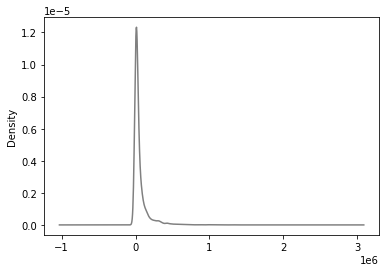

In [87]:
df['Product cost'].plot(kind = 'kde',color='gray')

## Bar Charts ##

Los gráficos de barras se utilizan con v**ariables categóricas** para encontrar su distribución. Aquí hay un gráfico de barras de muestra:

En este gráfico, puede ver la distribución del **Revenue** a través de diferentes métodos de pedido. En pandas, puede crear diagramas de barras pasando bar como valor al parámetro kind.


<Axes: xlabel='Order method type'>

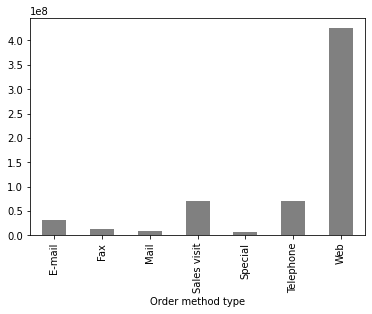

In [103]:
sales = pd.read_csv('sales.csv')
sales = sales.groupby('Order method type')['Revenue'].sum()
sales.plot(kind = 'bar',color='gray')

## Box Plot ##
Un diagrama de caja se usa para representar la distribución de datos numéricos y se usa principalmente para comparaciones. 





<Axes: >

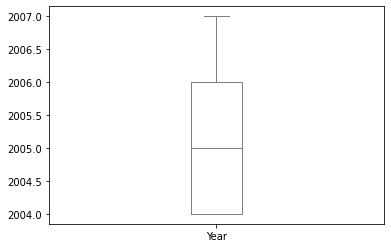

In [115]:
sales = pd.read_csv('sales.csv')
sales['Year'].plot(kind = 'box', color='gray')


## Gráfico de dispersión (Scatter Plot) ##

Los diagramas de dispersión se utilizan para representar los valores de dos variables numéricas. Los diagramas de dispersión le ayudan a determinar la relación entre las variables.


En este gráfico, puede observar la relación entre las dos variables. En pandas, puede crear diagramas de dispersión pasando dispersión como valor al parámetro de tipo.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Unit sale price', ylabel='Revenue'>

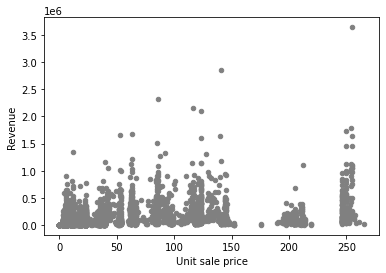

In [150]:
sales = pd.read_csv('sales.csv')
sales.plot(kind = 'scatter', x='Unit sale price',  y='Revenue', color='gray')

## Ejercicio 2.03: Visualización de datos con pandas ##

En este ejercicio usaremos el archivo sales.csv, para explorar los atributos en los datos de ventas. Esta vez, visualizaremos los datos de ventas para responder las siguientes dos preguntas:

1. ¿Qué modo de pedido genera la mayor cantidad de ingresos?
2. ¿Cómo han variado los siguientes parámetros durante cuatro años: 
- Ingresos, 
- Ingresos planificados y Utilidad bruta?

In [154]:
import pandas as pd

In [155]:
# 3. Cree un nuevo DataFrame llamado sales y cargue el archivo sales.csv en él.
# Examine si sus datos se cargaron correctamente al verificar los primeros valores en el DataFrame usando el comando head():
sales = pd.read_csv("sales.csv")
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Order method type'>

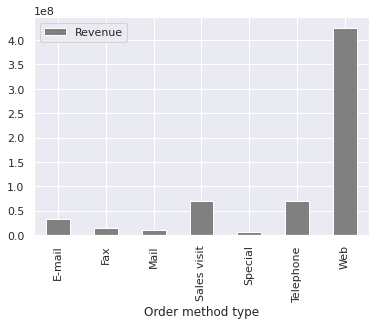

In [156]:
# 4. Agrupe el tipo de método Ingresos por pedido y cree un gráfico de barras:
sales.groupby('Order method type').sum()\
  .plot(kind = 'bar', y = 'Revenue', color = 'gray')


Year
2004    Axes(0.125,0.125;0.775x0.755)
2005    Axes(0.125,0.125;0.775x0.755)
2006    Axes(0.125,0.125;0.775x0.755)
2007    Axes(0.125,0.125;0.775x0.755)
dtype: object

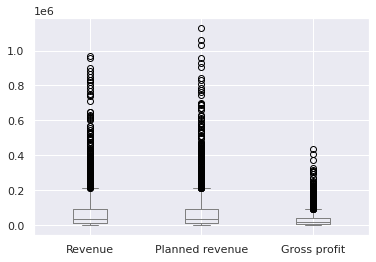

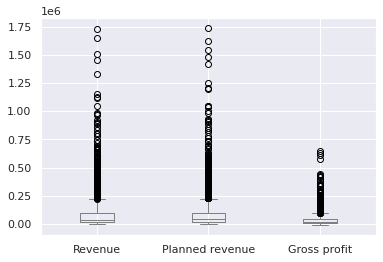

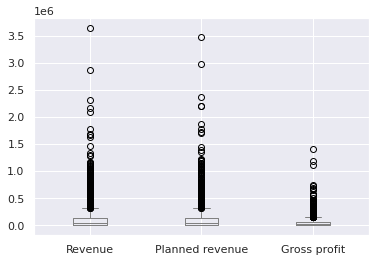

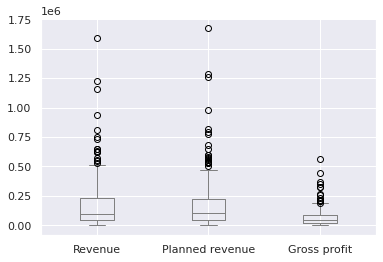

In [170]:
# 5. Ahora agrupe las columnas por año y cree diagramas de caja para tener una 
# idea en una escala relativa:
sales.groupby('Year')[['Revenue', 'Planned revenue', 'Gross profit']].plot(kind= 'box',  color='gray')

Debería obtener los siguientes gráficos:
- El primer gráfico representa el año 2004.
- El segundo gráfico representa el año 2005. 
- El tercer gráfico representa el año 2006 y la última representa el 2007.

Las burbujas en los gráficos representan valores atípicos. 
Los valores atípicos son valores extremos en los datos. 
Son causados ​​ya sea por errores en la medición o por el comportamiento real de los datos. 

El tratamiento atípico depende completamente del caso de uso empresarial. En algunos de los escenarios, los valores atípicos se eliminan o  se limitan a un valor determinado en función de las entradas del negocio. 

No siempre es recomendable descartar los valores atípicos, ya que pueden brindarnos mucha información oculta en los datos.

De los gráficos anteriores, podemos inferir que los ingresos  y los ingresos planificados tienen una mediana más alta que la ganancia bruta (la mediana está representada por la línea dentro del cuadro).


Aunque pandas le proporciona las tramas básicas, no le da mucho control sobre la apariencia de las visualizaciones.

Python tiene paquetes alternativos, como **seaborn**, que le permiten generar tramas más precisas y personalizadas. 

# Visualización a través de Seaborn

https://seaborn.pydata.org

Python tiene una biblioteca de visualización útil, **Seaborn**. Proporciona una API de alto nivel para generar fácilmente gráficos de alta calidad con muchas opciones de personalización.

Puede cambiar el entorno de pandas regulares/Matplotlib a Seaborn directamente a través de la función de configuración de Seaborn. Seaborn también admite una función displot, que traza la distribución real de la serie pandas a la que se pasó. Para generar histogramas a través de seaborn, puedes usar el siguiente código:






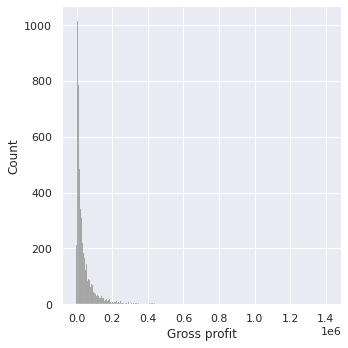

In [164]:
import seaborn as sns

sales = pd.read_csv("sales.csv")

sns.set()
sns.displot(sales['Gross profit'].dropna(), color='gray')


El código anterior traza un histograma de los valores de la columna Ganancia bruta. Hemos establecido el parámetro dropna() que le dice a la función de trazado que ignore los valores nulos si están presentes en los datos. La función sns.set() cambia el entorno de pandas/Matplotlib normales a seaborn.

El atributo de color se utiliza para proporcionar colores a los gráficos. En el código anterior, el color gris se usa para generar gráficos en escala de grises. Puede usar otros colores como verde oscuro, granate, etc. como valores de parámetros de color para obtener los gráficos en color.

Esto da la siguiente salida:

De la gráfica anterior, puede inferir que la mayor parte de la ganancia bruta es de alrededor de $1,000.

## Pair Plots ##

Los Pair Plots son una de las herramientas más efectivas para el análisis exploratorio de datos. Pueden considerarse como una colección de diagramas de dispersión entre las variables presentes en el conjunto de datos. Con una gráfica de pares, se puede estudiar fácilmente la distribución de una variable y su relación con las otras variables. Estos gráficos también revelan tendencias que pueden necesitar más exploración.

Por ejemplo, si su conjunto de datos tiene cuatro variables, un gráfico de pares generaría 16 gráficos que muestran la relación de todas las combinaciones de variables.

Para generar un gráfico de pares a través de seaborn, puede usar el siguiente código:


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has bee

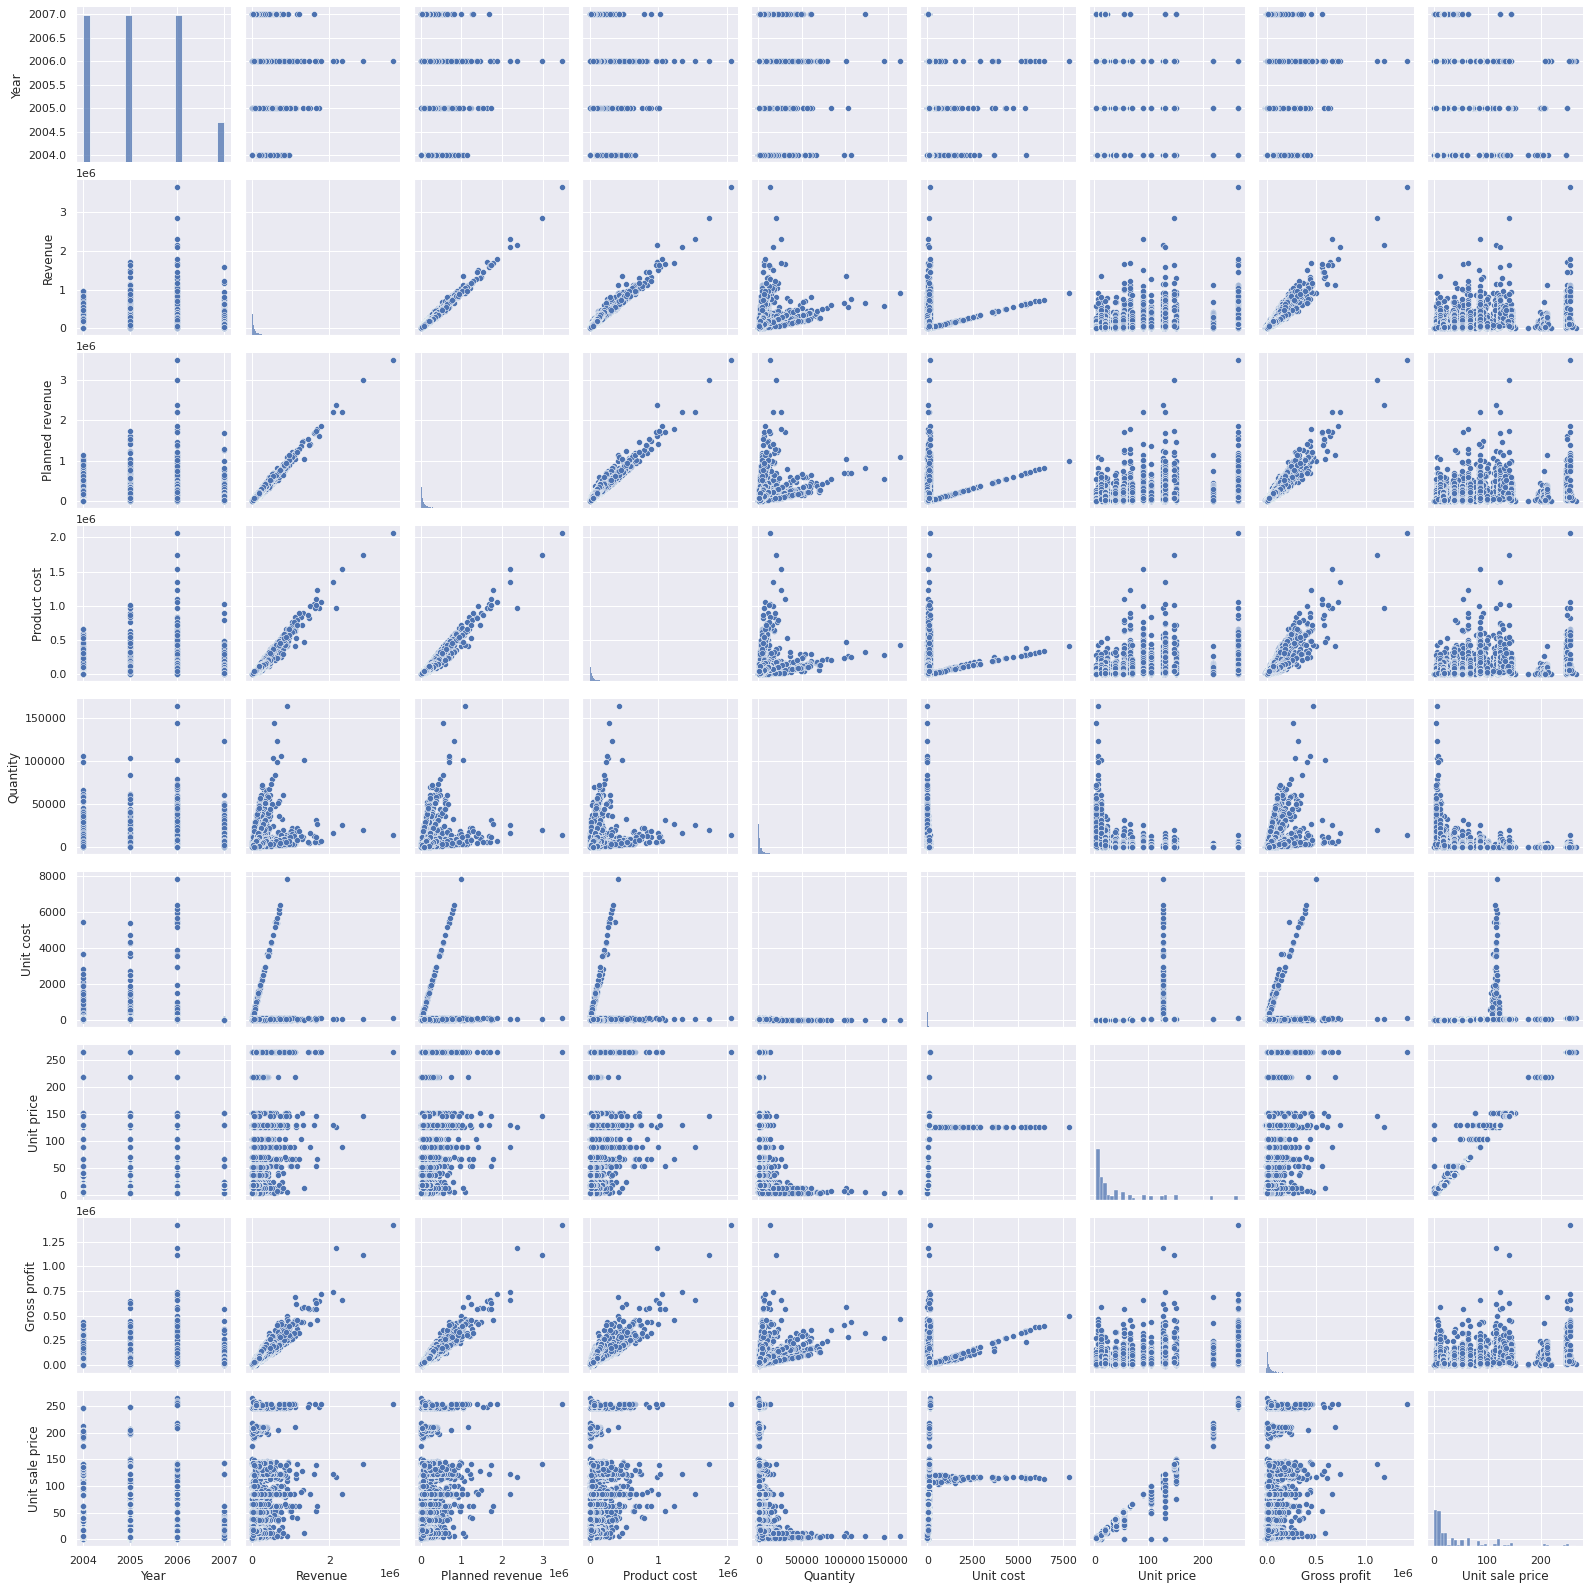

In [173]:
import seaborn as sns
sales = pd.read_csv("sales.csv")
sns.pairplot(sales, palette='gray')

El atributo de la paleta se utiliza para definir el color del gráfico de pares. En el anterior
código, el color gris se utiliza para generar gráficos en escala de grises.

Un diagrama de pares de ejemplo generado 

usando seaborn se vería así:

Las siguientes inferencias se pueden hacer a partir de la gráfica anterior.

1. Los ingresos y la ganancia bruta tienen una relación lineal; es decir, cuando aumentan los Ingresos aumenta la Utilidad Bruta
2. La cantidad y los ingresos no muestran tendencia; es decir, no hay relación.

En la siguiente sección, comprenderemos cómo visualizar información utilizando la biblioteca matplotlib.

## Visualización con Matplotlib ##

La biblioteca de visualización predeterminada de Python es matplotlib. Matplotlib se desarrolló originalmente para llevar las capacidades de visualización de la herramienta académica MATLAB a un lenguaje de programación de código abierto, Python. 
Matplotlib proporciona funciones adicionales de bajo nivel que se pueden agregar a gráficos creados a partir de cualquier otra biblioteca de visualización, como pandas o seaborn.
Para comenzar a usar matplotlib, primero debe importar el archivo matplotlib. pyplot objeto como plt. Este objeto plt se convierte en la base para generar figuras en matplotlib.




In [ ]:
import matplotlib.pyplot as plt

Entonces podemos ejecutar cualquier función en este objeto de la siguiente manera:

    plt.<function name>

Por ejemplo, en el DataFrame de ventas, puede trazar un gráfico de barras entre los productos y los ingresos mediante el siguiente código.

In [179]:
# Importar la biblioteca matplotlib
import matplotlib.pyplot as plt
sales = pd.read_csv('sales.csv')

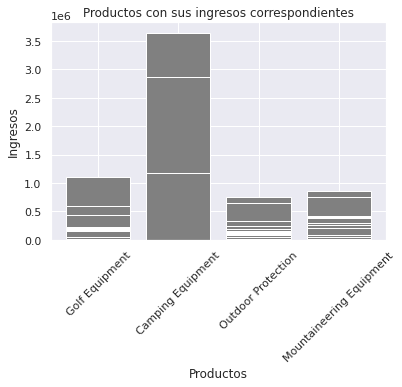

In [184]:
# Declarar el color del gráfico como gris 
plt.bar(sales['Product line'], sales['Revenue'], color='gray')

# Dar el título a la trama
plt.title("Productos con sus ingresos correspondientes")

# Nombrando los ejes x e y
plt.xlabel('Productos')
plt.ylabel('Ingresos')

# Gira las etiquetas del eje X 45 grados
plt.xticks(rotation = 45)
# Mostrar el diagrama de barras
plt.show()

## Actividad 2.01: Análisis de anuncios ##

Su empresa ha recopilado datos sobre las visualizaciones de anuncios a través de 
 varios medios en un archivo denominado Advertising.csv. La campaña publicitaria se transmitió por radio, televisión, Internet y periódicos, y debe extraer los datos para responder las siguientes preguntas:

1. ¿Cuáles son los valores únicos presentes en la columna Productos?
2. ¿Cuántos puntos de datos pertenecen a cada categoría en la columna Productos?
3. ¿Cuáles son las vistas totales en cada categoría en la columna Productos?
4. ¿Qué producto tiene la audiencia más alta en la televisión?
5. ¿Qué producto tiene la audiencia más baja en la web?

In [ ]:
# Importar pandas y las bibliotecas de visualización

# 2. Cargue los datos DataFrame llamado ads y revisar las primeras filas.
# Su DataFrame debería tener el siguiente aspecto:

# 3. Comprenda la distribución de variables numéricas en el conjunto de datos 
# usando la función de descripción.

# 4. Trace la relación entre las variables en el conjunto de datos con la 
# ayuda de gráficos de pares. Puede usar el parámetro de tono como Productos.
# El parámetro de tono determina qué columna se puede usar para la codificación 
# de colores. El uso de Productos como parámetro de tono mostrará los diferentes 
# productos en varios tonos de gris.

# Deberías obtener el siguiente resultado:


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=17EW3Q5ZEe9VgwQQHr_plaGrgj4ASD3-0' width="800" />
<figcaption>
Figura 2.64: Producto esperado de la Actividad 2.01</figcaption></center>
</figure>

En este capítulo, ha analizado el análisis exploratorio de datos. Aprendió a aprovechar pandas para ayudarlo a concentrarse en los atributos que son críticos para sus objetivos comerciales. Más tarde, aprendió a usar las herramientas que lo ayudaron a ajustar estos conocimientos para hacerlos más comprensibles para sus partes interesadas. 

Hacia al final del capítulo, usó bibliotecas de visualización como seaborn y matplotlib para presentar visualmente sus conocimientos. La visualización efectiva de datos también ayudará a revelar información oculta en sus datos. Las habilidades que ha aprendido hasta ahora deberían ayudarlo a crear una base sólida para su viaje hacia el dominio de las analíticas de marketing.

En el próximo capítulo, desarrollará estas habilidades aprendiendo algunas de las aplicaciones prácticas del análisis exploratorio de datos a través de ejemplos que puede encontrar en la práctica como analista de marketing.